In [ ]:
!pip install pandas_datareader
!pip install yfinance


In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import yfinance as yf
yf.pdr_override()

# Function to get data
def get_data(symbol, start_date, end_date):
    df = data.get_data_yahoo(tickers=symbol, start=start_date, end=end_date)
    df = df['Close']
    return df

# Function to preprocess data
def preprocess_data(df, split_ratio, length):
    # Scaling
    scaler = MinMaxScaler(feature_range=(0, 1))
    data_scaled = scaler.fit_transform(np.array(df).reshape(-1, 1))

    # Splitting into train and test sets
    training_size = int(len(data_scaled) * split_ratio)
    train_period, test_period = data_scaled[0:training_size], data_scaled[training_size - length:]

    # Creating time-series generator for training and testing
    train_gen = TimeseriesGenerator(train_period, train_period, length=length, batch_size=len(train_period))
    test_gen = TimeseriesGenerator(test_period, test_period, length=length, batch_size=len(test_period))

    # Extracting features and targets
    X_train, y_train = train_gen[0]
    X_test, y_test = test_gen[0]

    return X_train, y_train, X_test, y_test, scaler

# Function to create LSTM model
def create_model(X_train):
    model = Sequential()
    print("X_train.shape[1]：",X_train.shape[1])
    model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(LSTM(50, return_sequences=True))
    model.add(LSTM(50))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error',optimizer='adam')
    return model

# Function to calculate Mean Absolute Error (MAE)
def total_absolute_error(y_true, y_pred):
    return np.sum(np.abs(y_true - y_pred))

def get_and_preprocess_data(stock_symbol, start_date, end_date, split_ratio, length):
    data = get_data(stock_symbol, start_date, end_date)
    return preprocess_data(data, split_ratio, length)
def build_and_train_model(X_train, y_train, epochs=10, batch_size=64):
    model = create_model(X_train)
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)
    return model
def make_predictions(model, X_test, scaler):
    predictions = model.predict(X_test)
    return scaler.inverse_transform(predictions)

***NOTE:***

The function works as follows

**get_data:**
Get historical data for a specific stock.

**preprocess_data:**
Scales the data, divides the dataset into training and test sets, and creates time series data.

**total_absolute_error:**
Defines a function to calculate the mean absolute error between predicted and actual values.

**get_and_preprocess_data:**
Combines the data acquisition and preprocessing steps in order to complete both processes in one step.

**build_and_train_model:**
Builds and trains LSTM models using the previously defined model creation functions.

**make_predictions:**
Use the trained model to make predictions on the test data and convert the predictions from the scaled form back to the original form.

In [ ]:

# Parameters
length = 10
split_ratio = 0.8

# Get and preprocess data for Hang Seng Index
X_train_sse, y_train_sse, X_test_sse, y_test_sse, scaler_sse = get_and_preprocess_data('000001.ss', '2013-01-01', '2022-12-31', split_ratio, length)

# Get and preprocess data for Bitcoin
X_train_eth, y_train_eth, X_test_eth, y_test_eth, scaler_eth = get_and_preprocess_data('ETH-USD', '2018-01-01', '2022-12-31', split_ratio, length)

# Create and preprocess artificial data
num_points = 1200
num_cycles = 20
time_series = np.linspace(0, num_cycles * 2 * np.pi, num_points)
# Create a sine wave
sine_wave = np.sin(time_series)
# Add random noise
noise = np.random.normal(scale=0.1, size=num_points)
# Generate sine wave data with noise
sine_data_with_noise = sine_wave + noise
# Create a pandas Series, indexed by date
sine_data = pd.Series(sine_data_with_noise, index=pd.date_range(start='1/1/2018', periods=num_points))
X_train_sine, y_train_sine, X_test_sine, y_test_sine, scaler_sine = preprocess_data(sine_data, split_ratio, length)


# Train models
model_sse = build_and_train_model(X_train_sse, y_train_sse)
model_eth = build_and_train_model(X_train_eth, y_train_eth)
model_sine = build_and_train_model(X_train_sine, y_train_sine)

# Make predictions
test_pred_sse = make_predictions(model_sse, X_test_sse, scaler_sse)
test_pred_eth = make_predictions(model_eth, X_test_eth, scaler_eth)
test_pred_sine = make_predictions(model_sine, X_test_sine, scaler_sine)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
X_train.shape[1]： 10
Epoch 1/10
31/31 [==============================] - 8s 33ms/step - loss: 0.0218
Epoch 2/10
31/31 [==============================] - 1s 48ms/step - loss: 0.0022
Epoch 3/10
31/31 [==============================] - 1s 39ms/step - loss: 0.0013
Epoch 4/10
31/31 [==============================] - 1s 38ms/step - loss: 0.0013
Epoch 5/10
31/31 [==============================] - 1s 41ms/step - loss: 0.0013
Epoch 6/10
31/31 [==============================] - 1s 42ms/step - loss: 0.0013
Epoch 7/10
31/31 [==============================] - 1s 40ms/step - loss: 0.0013
Epoch 8/10
31/31 [==============================] - 2s 62ms/step - loss: 0.0012
Epoch 9/10
31/31 [==============================] - 2s 75ms/step - loss: 0.0012
Epoch 10/10
31/31 [==============================] - 1s 47ms/step - loss: 0.0013
X_train.shape[1]： 10
Epoch 1/10
23/23 [=

***NOTE:***

This part is to create three time series, then perform model training and model prediction, and finally obtain the inverse normalized testset predictions.

SSE total_absolute_error: 27515.6806640625


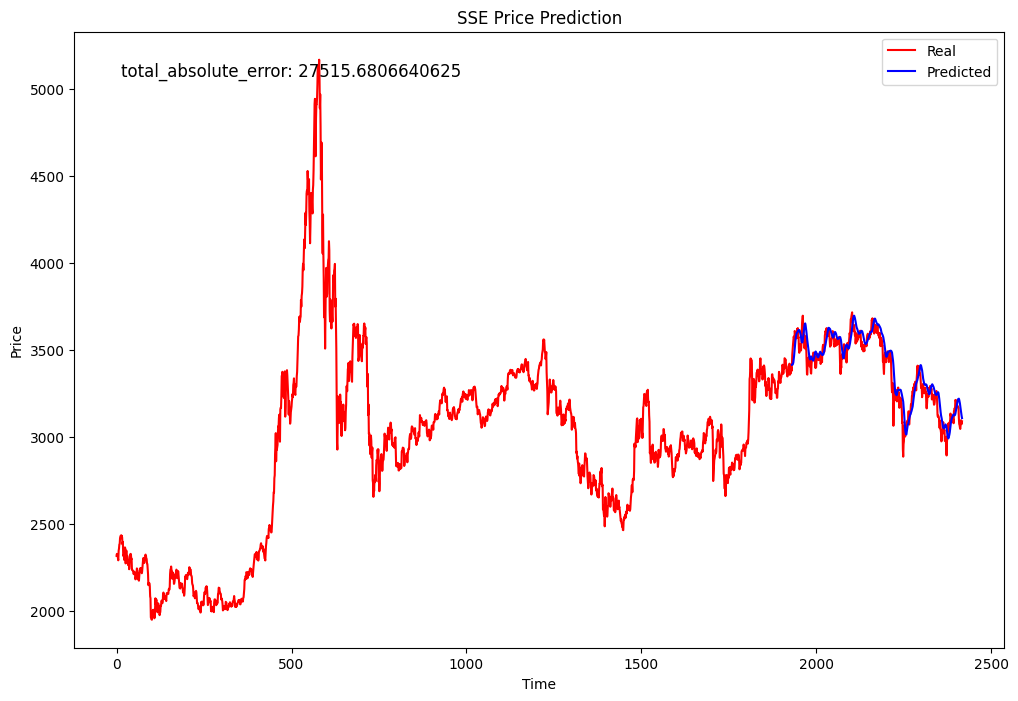

ETH-USD total_absolute_error: 73609.74676513672


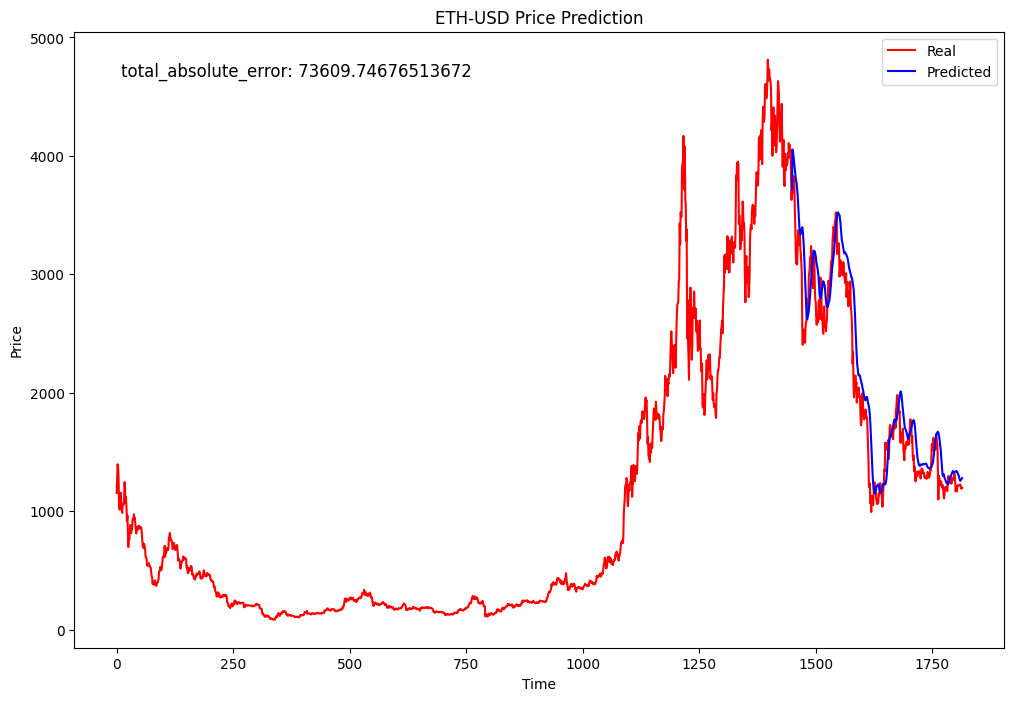

SINE total_absolute_error: 32.467469970776044


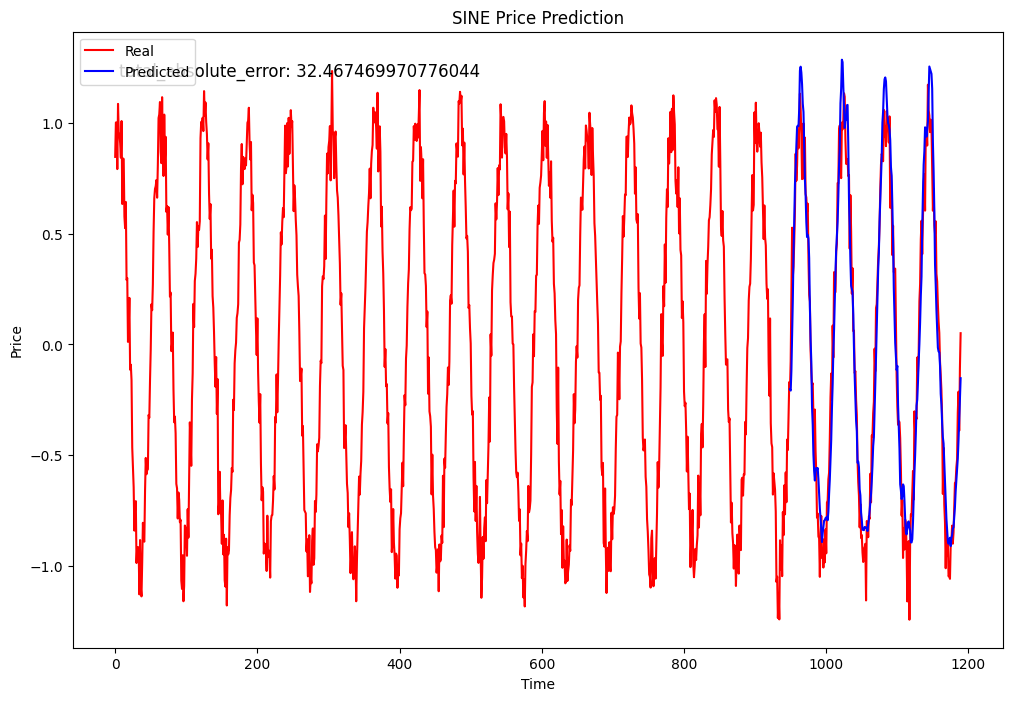

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_predictions(y_train, y_test, test_pred, scaler, title, model, X_test):
    #Inverse normalization of y_test
    y_test=scaler.inverse_transform(y_test)
    accuracy=np.sum(np.abs(y_test - test_pred))
    # print(accuracy)
    print(f"{title} total_absolute_error: {accuracy}")

    error_text = f"total_absolute_error: {accuracy}"
    # print(test_pred)



    # plot
    plt.figure(figsize=(12, 8))
    combined_real = np.concatenate((scaler.inverse_transform(y_train),y_test ))
    combined_pred = np.concatenate((scaler.inverse_transform(y_train)[-1:], test_pred))
    plt.plot(combined_real, color='red', label='Real')
    plt.plot(np.arange(len(y_train) - 1, len(y_train) + len(y_test)), combined_pred, color='blue', label='Predicted')
    plt.title(f'{title} Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    plt.text(0.05, 0.95, error_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
    plt.show()

plot_predictions(y_train_sse, y_test_sse, test_pred_sse, scaler_sse, 'SSE', model_sse, X_test_sse)
plot_predictions(y_train_eth, y_test_eth, test_pred_eth, scaler_eth, 'ETH-USD', model_eth, X_test_eth)
plot_predictions(y_train_sine, y_test_sine, test_pred_sine, scaler_sine, 'SINE', model_sine, X_test_sine)



***NOTE:***

This part is to draw the graph and calculate the error according to the formula Σ |true value – predicted value|.

The accuracy of the Shanghai Stock Exchange Index is about 27515.

The accuracy of the Ethereum price in USD is about 73609.

The accuracy of the artificial time seriesis about 32.